In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
from peakutils.baseline import baseline
from ramannoodles import spectrafit

In [3]:
# open spectra library
shoyu_data_dict = pickle.load(open('../raman_spectra/shoyu_data_dict.p', 'rb'))
# list keys
sorted(shoyu_data_dict.keys())

['2-PROPANOL',
 'CARBON DIOXIDE',
 'CARBON MONOXIDE',
 'DIMETHYL KETONE',
 'ETHYL ALCOHOL',
 'FORMALDEHYDE',
 'FORMIC ACID',
 'N-PENTANE',
 'WATER']

In [70]:
# extract spectra data
data = shoyu_data_dict['WATER']
x_data = data['x']
y_data = data['y']

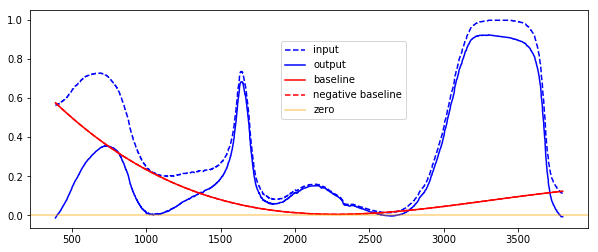

In [71]:
y_base = baseline(y_data, deg=3, max_it=200)
# to avoid strange results,
# change all negative values to zero
yb_plus = [0 if i < 0 else i for i in y_base]
y_out = y_data - yb_plus
# plot that lets you see the baseline fitting

plt.figure(figsize=(10,4))
plt.plot(x_data, y_data, 'b--', label='input')
plt.plot(x_data, y_out, 'b', label='output')
plt.plot(x_data, yb_plus, 'r', label='baseline')
plt.plot(x_data, y_base, 'r--', label='negative baseline')
plt.axhline(y=0, color='orange', alpha=0.5, label='zero') 
plt.legend(loc=(0.45,0.5))



In [43]:
# extract spectra data
data = shoyu_data_dict['DIMETHYL KETONE']
x_data = 10000/data['x']
y_data = data['y']


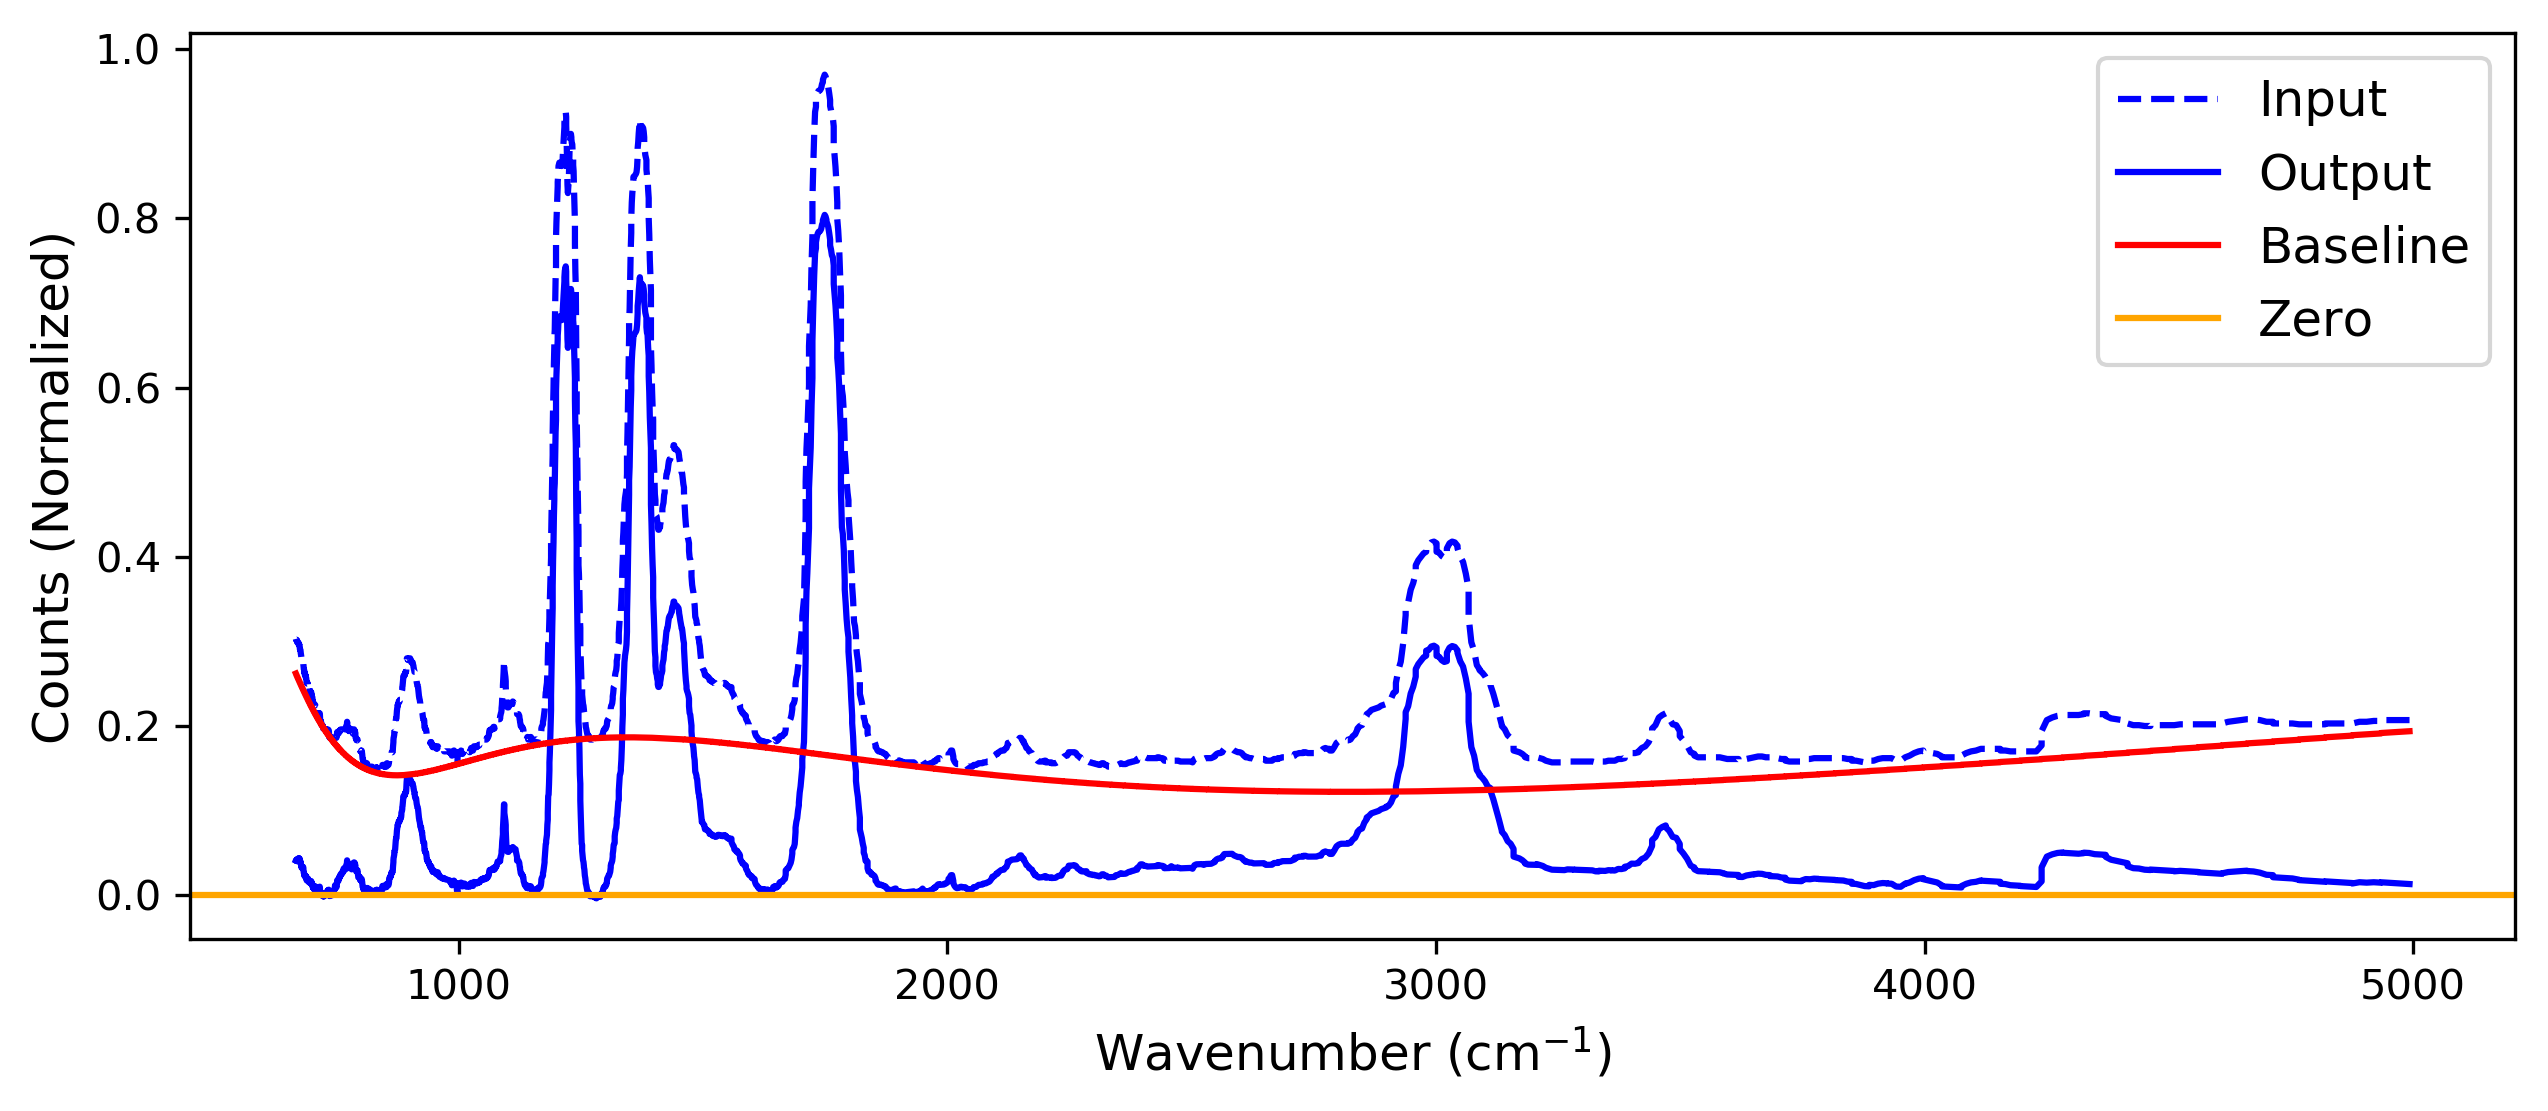

In [69]:
y_base = baseline(y_data, deg=5, max_it=200)
# to avoid strange results,
# change all negative values to zero
yb_plus = [0 if i < 0 else i for i in y_base]
y_out = y_data - yb_plus
# plot that lets you see the baseline fitting

plt.figure(figsize=(10,4), dpi=300)
plt.plot(x_data, y_data, 'b--', label='Input')
plt.plot(x_data, y_out, 'b', label='Output')
plt.plot(x_data, yb_plus, 'r', label='Baseline')
# plt.plot(x_data, y_base, 'r--', label='negative baseline')
plt.axhline(y=0, color='orange', alpha=1, label='Zero') 
plt.legend(loc=1, fontsize = 12)
plt.xlabel('Wavenumber (cm$^{-1}$)', fontsize = 12)
plt.ylabel('Counts (Normalized)', fontsize = 12)
# plt.savefig('baseline_example.png')